### Section A: Data Cleaning

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv.crdownload')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [5]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [6]:
education_mapping = {
    "associate's degree": 'College/Associate',
    'some college': 'College/Associate',
    "bachelor's degree": 'Graduate',
    "master's degree": 'Graduate',
    'high school': 'High School',
    'some high school': 'High School'
}
df['parental level of education'] = df['parental level of education'].replace(education_mapping)
display(df['parental level of education'].unique())

array(['Graduate', 'College/Associate', 'High School'], dtype=object)

In [7]:
df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def categorize_performance(score):
    if score < 60:
        return 'Low'
    elif score < 80:
        return 'Medium'
    else:
        return 'High'

df['Performance_Category'] = df['Average Score'].apply(categorize_performance)
display(df[['Average Score', 'Performance_Category']].head())

,Average Score,Performance_Category
0,72.666667,Medium
1,82.333333,High
2,92.666667,High
3,49.333333,Low
4,76.333333,Medium


```
```

### SECTION B: SQL Operations


In [8]:
#List top 5 students with highest average scores.

# SELECT
#     ROW_NUMBER() OVER (ORDER BY (math_score + reading_score + writing_score)/3 DESC) AS rank,
#     gender, race_ethnicity,
#     (math_score + reading_score + writing_score)/3 AS avg_score
# FROM StudentsPerformance
# ORDER BY avg_score DESC
# LIMIT 5;

In [9]:
# #Find the average math, reading, and writing scores by gender.

# SELECT
#     gender,
#     AVG(math_score)   AS avg_math,
#     AVG(reading_score) AS avg_reading,
#     AVG(writing_score) AS avg_writing
# FROM StudentsPerformance
# GROUP BY gender;


# # Compare average scores of students who completed test prep vs. those who didn’t.

# SELECT
#     test_preparation_course,
#     AVG(math_score)   AS avg_math,
#     AVG(reading_score) AS avg_reading,
#     AVG(writing_score) AS avg_writing,
#     AVG((math_score + reading_score + writing_score)/3) AS avg_overall
# FROM StudentsPerformance
# GROUP BY test_preparation_course;


# # Count how many students fall into each performance category.
# # (Let's assume performance category is based on average score):
# # Excellent ≥ 80
# # Good 60–79
# # Average 40–59
# # Poor < 40

# SELECT
#     CASE
#         WHEN (math_score + reading_score + writing_score)/3 >= 80 THEN 'Excellent'
#         WHEN (math_score + reading_score + writing_score)/3 BETWEEN 60 AND 79 THEN 'Good'
#         WHEN (math_score + reading_score + writing_score)/3 BETWEEN 40 AND 59 THEN 'Average'
#         ELSE 'Poor'
#     END AS performance_category,
#     COUNT(*) AS student_count
# FROM StudentsPerformance
# GROUP BY performance_category;


# # Identify which ethnic group has the highest average total score.

# SELECT
#     race_ethnicity,
#     AVG(math_score + reading_score + writing_score) AS avg_total_score
# FROM StudentsPerformance
# GROUP BY race_ethnicity
# ORDER BY avg_total_score DESC
# LIMIT 1;



```

```

### SECTION C: EXPLORATORY DATA ANALYSIS AND DESCRIPTIVE STATISTICS

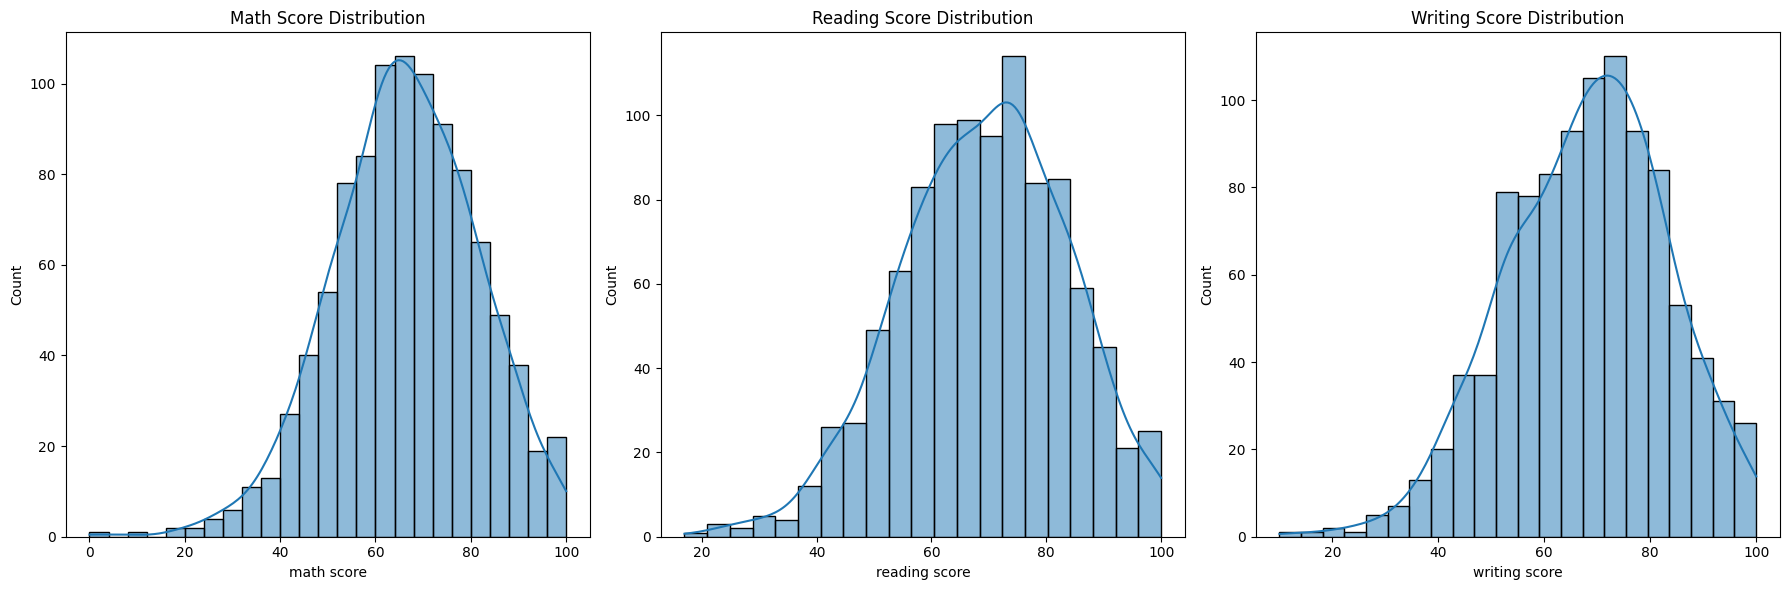

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['math score'], kde=True, ax=axes[0])
axes[0].set_title('Math Score Distribution')

sns.histplot(df['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Reading Score Distribution')

sns.histplot(df['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Writing Score Distribution')

plt.tight_layout()
plt.show()

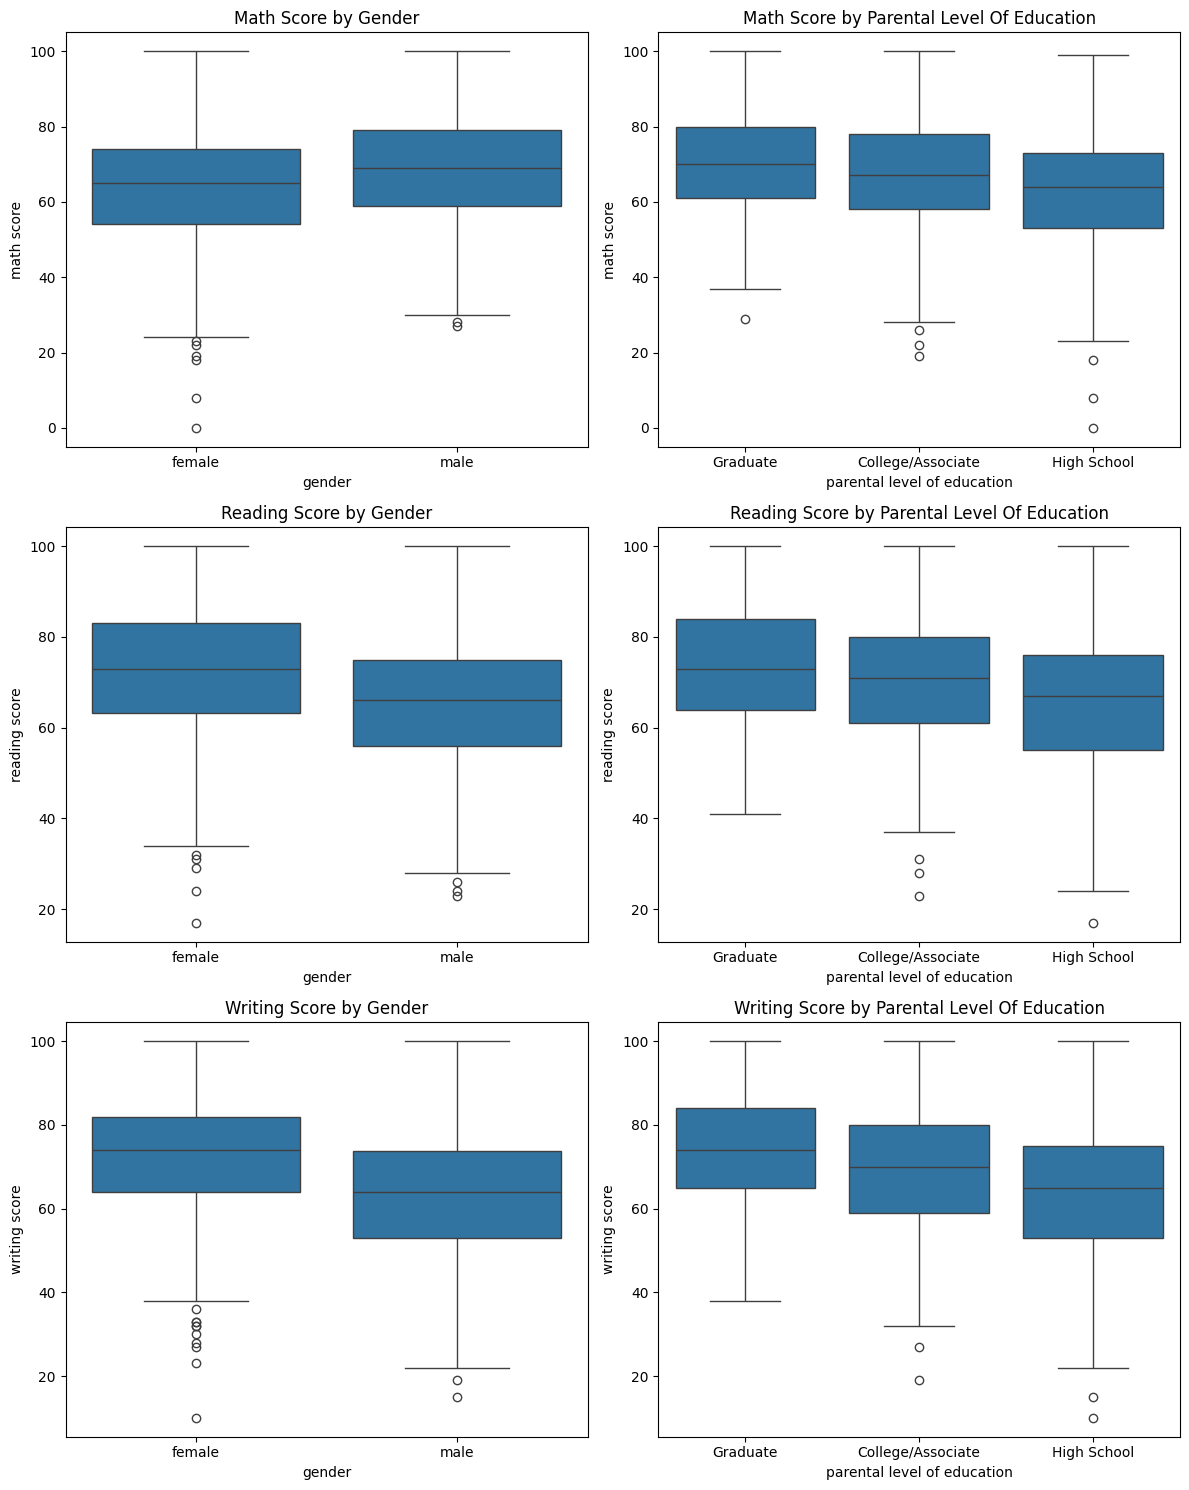

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

scores = ['math score', 'reading score', 'writing score']
genders = ['gender', 'parental level of education']

for i, score in enumerate(scores):
    for j, gender in enumerate(genders):
        sns.boxplot(x=gender, y=score, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{score.replace("_", " ").title()} by {gender.replace("_", " ").title()}')


plt.tight_layout()
plt.show()

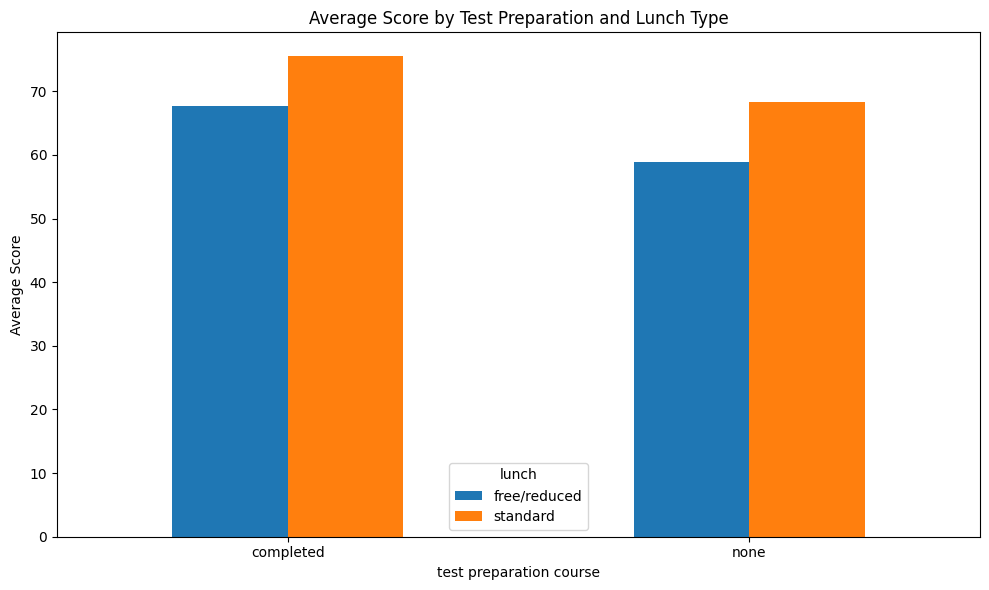

In [12]:
average_score_by_prep_lunch = df.groupby(['test preparation course', 'lunch'])['Average Score'].mean().unstack()
average_score_by_prep_lunch.plot(kind='bar', figsize=(10, 6))
plt.title('Average Score by Test Preparation and Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

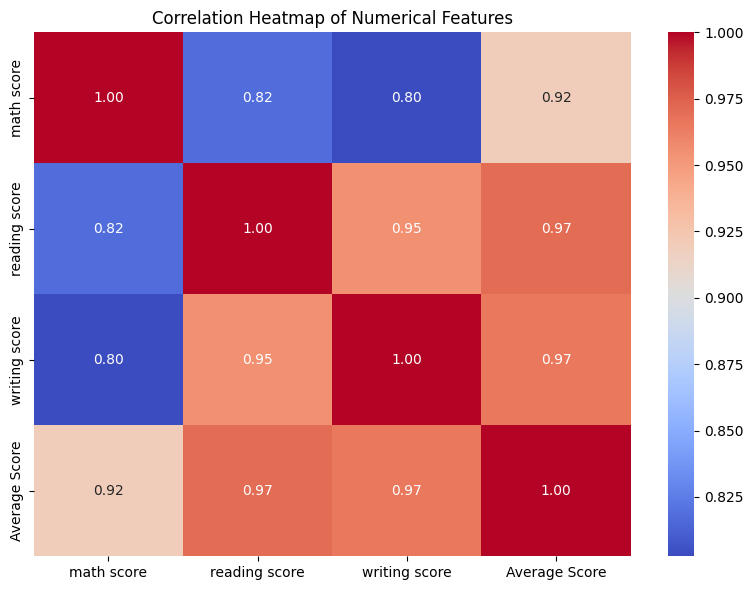

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

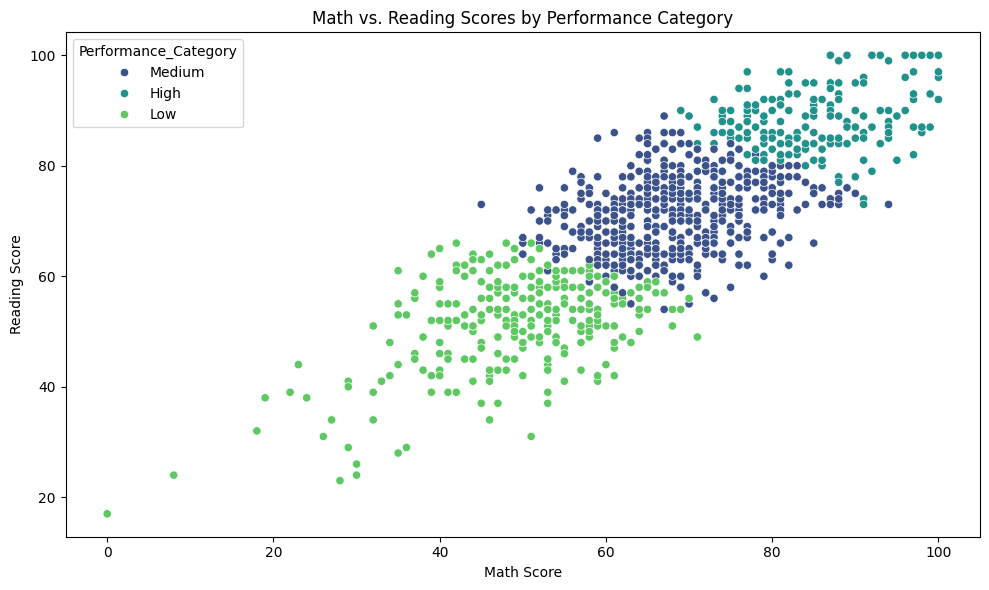

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='reading score', hue='Performance_Category', data=df, palette='viridis')
plt.title('Math vs. Reading Scores by Performance Category')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.show()

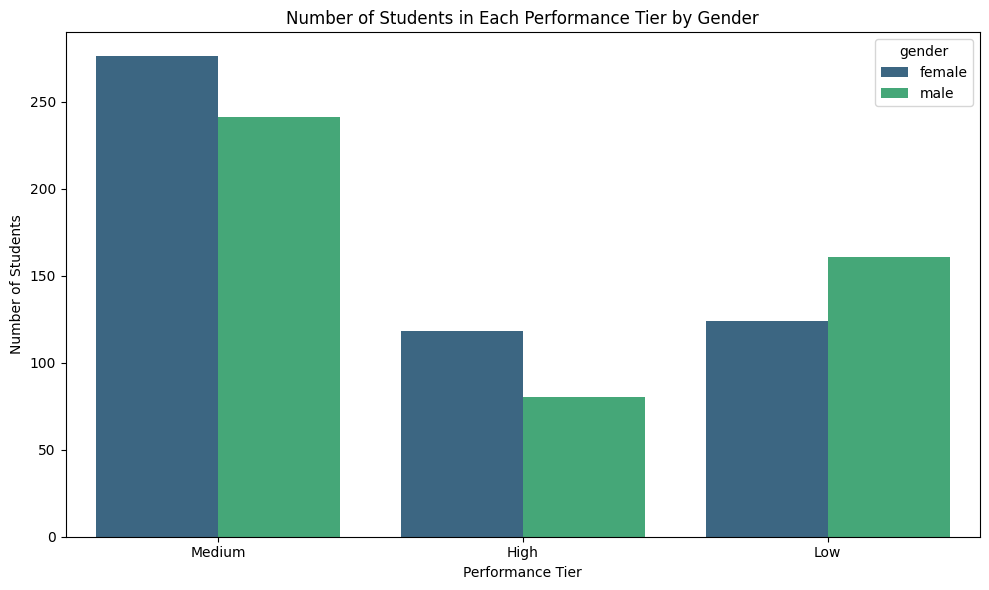

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Performance_Category', hue='gender', data=df, palette='viridis')
plt.title('Number of Students in Each Performance Tier by Gender')
plt.xlabel('Performance Tier')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

Descriptive Statistics:


In [16]:
descriptive_stats = df[['math score', 'reading score', 'writing score']].agg(['mean', 'median', 'var', 'std'])
display(descriptive_stats)

,math score,reading score,writing score
mean,66.089000,69.169000,68.054000
median,66.000000,70.000000,69.000000
var,229.918998,213.165605,230.907992
std,15.163080,14.600192,15.195657


In [17]:
average_score_by_lunch = df.groupby('lunch')[['math score', 'reading score', 'writing score', 'Average Score']].mean()
display(average_score_by_lunch)

,math score,reading score,writing score,Average Score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


In [18]:
average_score_by_preparation = df.groupby('test preparation course')[['math score', 'reading score', 'writing score', 'Average Score']].mean()
display(average_score_by_preparation)

,math score,reading score,writing score,Average Score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [19]:
mean_scores = df[['math score', 'reading score', 'writing score']].mean()
std_scores = df[['math score', 'reading score', 'writing score']].std()
coefficient_of_variation = (std_scores / mean_scores) * 100
display(coefficient_of_variation)

,0
math score,22.943425
reading score,21.107999
writing score,22.328823


In [20]:
average_score_by_gender = df.groupby('gender')['Average Score'].mean().sort_values(ascending=False)
display(average_score_by_gender)


,Average Score
gender,
female,69.569498
male,65.837483


In [21]:
average_score_by_education = df.groupby('parental level of education')['Average Score'].mean().sort_values(ascending=False)
display(average_score_by_education)

,Average Score
parental level of education,
Graduate,72.482109
College/Associate,69.017857
High School,64.056889


In [22]:
average_score_by_lunch = df.groupby('lunch')['Average Score'].mean().sort_values(ascending=False)
display(average_score_by_lunch)

,Average Score
lunch,
standard,70.837209
free/reduced,62.199061


In [23]:
average_score_by_preparation = df.groupby('test preparation course')['Average Score'].mean().sort_values(ascending=False)
display(average_score_by_preparation)

,Average Score
test preparation course,
completed,72.669460
none,65.038941


In [24]:
average_score_by_ethnicity = df.groupby('race/ethnicity')['Average Score'].mean().sort_values(ascending=False)
display(average_score_by_ethnicity)

,Average Score
race/ethnicity,
group E,72.752381
group D,69.179389
group C,67.131661
group B,65.468421
group A,62.992509


In [25]:
variance_by_gender = df.groupby('gender')['Average Score'].var().sort_values(ascending=False)
display(variance_by_gender)

,Average Score
gender,
female,211.464213
male,187.658218


In [26]:
variance_by_education = df.groupby('parental level of education')['Average Score'].var().sort_values(ascending=False)
display(variance_by_education)

,Average Score
parental level of education,
High School,203.042507
Graduate,190.892513
College/Associate,187.327048


In [27]:
variance_by_lunch = df.groupby('lunch')['Average Score'].var().sort_values(ascending=False)
display(variance_by_lunch)

,Average Score
lunch,
free/reduced,209.043125
standard,173.883914


In [28]:
variance_by_preparation = df.groupby('test preparation course')['Average Score'].var().sort_values(ascending=False)
display(variance_by_preparation)

,Average Score
test preparation course,
none,201.262652
completed,169.962333


In [29]:
variance_by_ethnicity = df.groupby('race/ethnicity')['Average Score'].var().sort_values(ascending=False)
display(variance_by_ethnicity)

,Average Score
race/ethnicity,
group B,217.035741
group E,212.139683
group A,208.646408
group C,192.438236
group D,175.636066


## Machine Learning on StudentsPerformance

In [30]:
df_ml = df.copy()
categorical_cols = df_ml.select_dtypes(include=['object']).columns
df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)
display(df_ml.head())

,math score,reading score,writing score,Average Score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_Graduate,parental level of education_High School,lunch_standard,test preparation course_none,Performance_Category_Low,Performance_Category_Medium
0,72,72,74,72.666667,False,True,False,False,False,True,False,True,True,False,True
1,69,90,88,82.333333,False,False,True,False,False,False,False,True,False,False,False
2,90,95,93,92.666667,False,True,False,False,False,True,False,True,True,False,False
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,True,True,False
4,76,78,75,76.333333,True,False,True,False,False,False,False,True,True,False,True


In [31]:
y_reg = df_ml['Average Score']
X_reg = df_ml.drop(['math score', 'reading score', 'writing score', 'Average Score', 'Performance_Category_Low', 'Performance_Category_Medium'], axis=1)

print("Shape of X_reg:", X_reg.shape)
print("Shape of y_reg:", y_reg.shape)

Shape of X_reg: (1000, 9)
Shape of y_reg: (1000,)


In [32]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [33]:
linear_reg_model.fit(X_reg, y_reg)

LinearRegression()

In [34]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(random_state=42)

In [35]:
random_forest_regressor.fit(X_reg, y_reg)

RandomForestRegressor(random_state=42)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_reg_predictions = linear_reg_model.predict(X_reg)
random_forest_predictions = random_forest_regressor.predict(X_reg)

linear_reg_mae = mean_absolute_error(y_reg, linear_reg_predictions)
random_forest_mae = mean_absolute_error(y_reg, random_forest_predictions)

linear_reg_mse = mean_squared_error(y_reg, linear_reg_predictions)
random_forest_mse = mean_squared_error(y_reg, random_forest_predictions)

linear_reg_r2 = r2_score(y_reg, linear_reg_predictions)
random_forest_r2 = r2_score(y_reg, random_forest_predictions)

print(f"Linear Regression MAE: {linear_reg_mae:.4f}")
print(f"Random Forest Regressor MAE: {random_forest_mae:.4f}")
print(f"Linear Regression MSE: {linear_reg_mse:.4f}")
print(f"Random Forest Regressor MSE: {random_forest_mse:.4f}")
print(f"Linear Regression R²: {linear_reg_r2:.4f}")
print(f"Random Forest Regressor R²: {random_forest_r2:.4f}")

Linear Regression MAE: 10.0184
Random Forest Regressor MAE: 9.4801
Linear Regression MSE: 154.1004
Random Forest Regressor MSE: 140.5943
Linear Regression R²: 0.2411
Random Forest Regressor R²: 0.3076


In [37]:
y_clf = df['Performance_Category']
X_clf = df_ml.drop(['math score', 'reading score', 'writing score', 'Average Score', 'Performance_Category_Low', 'Performance_Category_Medium'], axis=1)

print("Shape of X_clf:", X_clf.shape)
print("Shape of y_clf:", y_clf.shape)

Shape of X_clf: (1000, 9)
Shape of y_clf: (1000,)


In [38]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_clf, y_clf)

LogisticRegression(max_iter=1000)

In [39]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_clf, y_clf)

feature_importances = decision_tree_classifier.feature_importances_
feature_names = X_clf.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

display(importance_df)

,Feature,Importance
7,lunch_standard,0.181751
8,test preparation course_none,0.141389
5,parental level of education_Graduate,0.133290
0,gender_male,0.130003
6,parental level of education_High School,0.107511
4,race/ethnicity_group E,0.104642
1,race/ethnicity_group B,0.079001
3,race/ethnicity_group D,0.064995
2,race/ethnicity_group C,0.057419


In [40]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_clf, y_clf)

feature_importances = random_forest_classifier.feature_importances_
feature_names = X_clf.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

display(importance_df)

,Feature,Importance
7,lunch_standard,0.174089
0,gender_male,0.163115
8,test preparation course_none,0.149394
6,parental level of education_High School,0.105163
5,parental level of education_Graduate,0.099005
1,race/ethnicity_group B,0.081449
2,race/ethnicity_group C,0.079789
3,race/ethnicity_group D,0.075540
4,race/ethnicity_group E,0.072457


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_reg_predictions = logistic_reg_model.predict(X_clf)
decision_tree_predictions = decision_tree_classifier.predict(X_clf)
random_forest_predictions = random_forest_classifier.predict(X_clf)

In [42]:
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_clf, logistic_reg_predictions):.4f}")
print(f"Precision: {precision_score(y_clf, logistic_reg_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_clf, logistic_reg_predictions, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_clf, logistic_reg_predictions, average='weighted'):.4f}\n")

print("Decision Tree Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_clf, decision_tree_predictions):.4f}")
print(f"Precision: {precision_score(y_clf, decision_tree_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_clf, decision_tree_predictions, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_clf, decision_tree_predictions, average='weighted'):.4f}\n")

print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_clf, random_forest_predictions):.4f}")
print(f"Precision: {precision_score(y_clf, random_forest_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_clf, random_forest_predictions, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_clf, random_forest_predictions, average='weighted'):.4f}")

Logistic Regression Evaluation:
Accuracy: 0.5490
Precision: 0.5355
Recall: 0.5490
F1-score: 0.4919

Decision Tree Classifier Evaluation:
Accuracy: 0.5990
Precision: 0.5964
Recall: 0.5990
F1-score: 0.5753

Random Forest Classifier Evaluation:
Accuracy: 0.5990
Precision: 0.6009
Recall: 0.5990
F1-score: 0.5716




> Add blockquote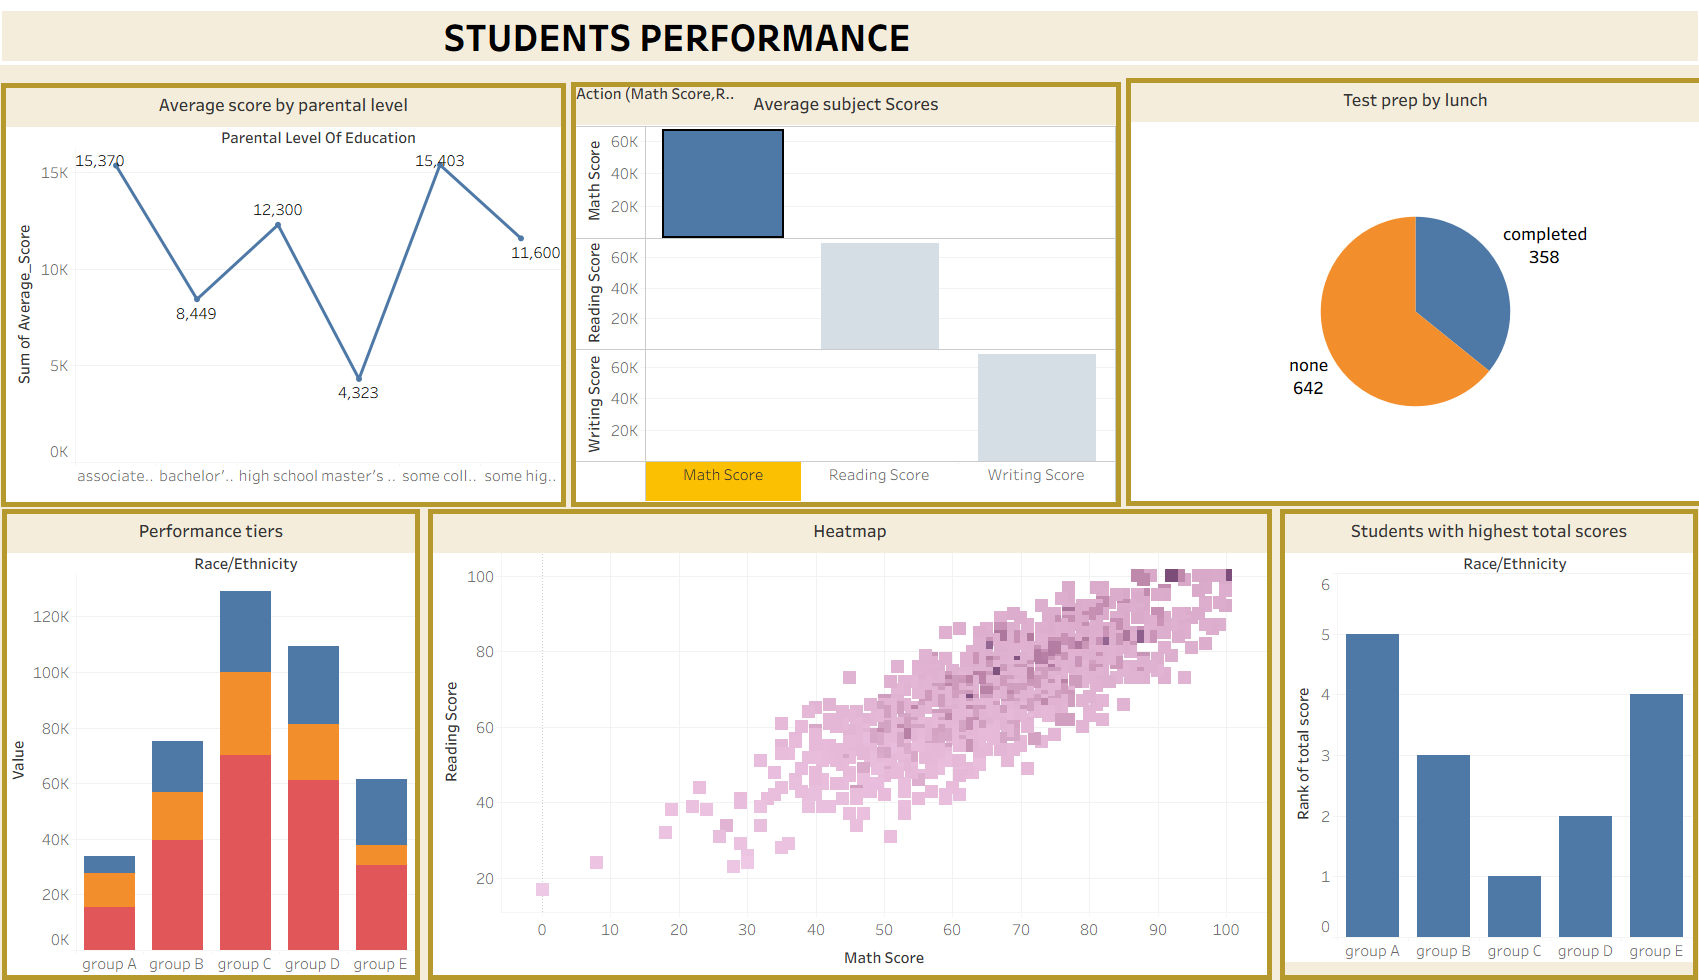

